In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import tensorflow as tf
print(tf.__version__)

2024-05-03 15:11:21.037567: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0


In [4]:
dataset = pd.read_csv('../data/archive/train.csv')
dataset.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [9]:
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [11]:
import keras

In [12]:
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

2024-05-03 15:11:24.569878: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 971us/step - loss: 1.4573 - accuracy: 0.2422
Epoch 2/100
29/29 [==============================] - 0s 862us/step - loss: 1.4117 - accuracy: 0.2711
Epoch 3/100
29/29 [==============================] - 0s 837us/step - loss: 1.3811 - accuracy: 0.2928
Epoch 4/100
29/29 [==============================] - 0s 767us/step - loss: 1.3526 - accuracy: 0.3350
Epoch 5/100
29/29 [==============================] - 0s 743us/step - loss: 1.3205 - accuracy: 0.3828
Epoch 6/100
29/29 [==============================] - 0s 734us/step - loss: 1.2796 - accuracy: 0.4261
Epoch 7/100
29/29 [==============================] - 0s 727us/step - loss: 1.2266 - accuracy: 0.4750
Epoch 8/100
29/29 [==============================] - 0s 741us/step - loss: 1.1593 - accuracy: 0.5167
Epoch 9/100
29/29 [==============================] - 0s 739us/step - loss: 1.0784 - accuracy: 0.5539
Epoch 10/100
29/29 [==============================] - 0s 736us/step - loss: 0.9893 - accura

In [15]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

7/7 [==============================] - 0s 757us/step


In [16]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 92.5


In [17]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0370 - accuracy: 0.9967 - val_loss: 0.1598 - val_accuracy: 0.9250
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9967 - val_loss: 0.1628 - val_accuracy: 0.9300
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9978 - val_loss: 0.1580 - val_accuracy: 0.9250
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9972 - val_loss: 0.1579 - val_accuracy: 0.9300
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9950 - val_loss: 0.1592 - val_accuracy: 0.9300
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.9972 - val_loss: 0.1554 - val_accuracy: 0.9250
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 0.9978 - val_loss: 0.1605 - val_accuracy: 0.9300
Epoch 8/100
2

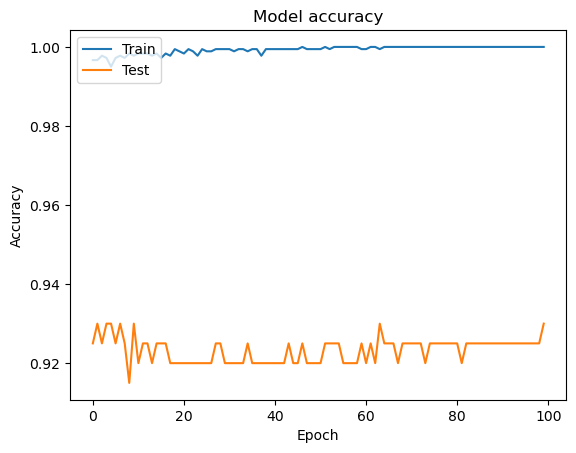

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

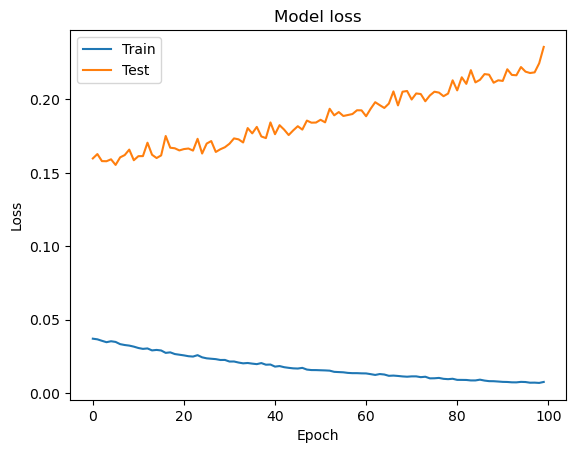

In [19]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()